In [1]:
pip install tensorflow matplotlib numpy

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training started...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.9008 - loss: 0.3204 - val_accuracy: 0.9850 - val_loss: 0.0434
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9842 - loss: 0.0491 - val_accuracy: 0.9863 - val_loss: 0.0403
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 30ms/step - accuracy: 0.9901 - loss: 0.0315 - val_accuracy: 0.9904 - val_loss: 0.0275
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9929 - loss: 0.0234 - val_accuracy: 0.9907 - val_loss: 0.0316
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9890 - val_loss: 0.0364
313/313 - 3s - 8ms/step - accuracy: 0.9890 - loss: 0.0364

Test Accuracy: 98.90%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted digit: 7


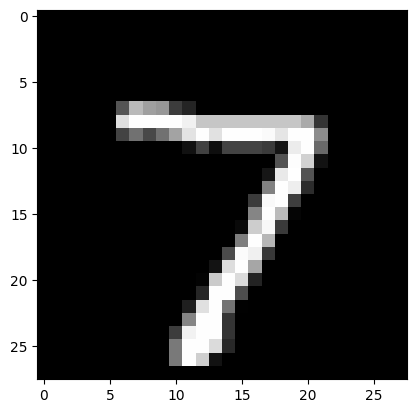

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 2. Preprocess the data
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to include the channel dimension (grayscale = 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 3. Build the CNN Model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output classes (0-9)
])

# 4. Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train the Model
print("Training started...")
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 6. Evaluate and Predict
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest Accuracy: {test_acc*100:.2f}%')

# Visualizing a prediction
prediction = model.predict(x_test[:1])
print(f"Predicted digit: {prediction.argmax()}")
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.show()

In [3]:
# Save the model
model.save('my_mnist_model.h5')

# Later, load it back in another script
from tensorflow.keras.models import load_model
model = load_model('my_mnist_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


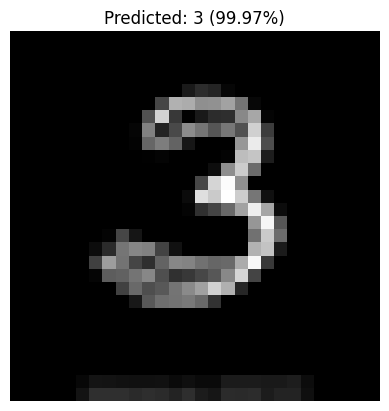

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# 1. Load the model you saved earlier
# If you just trained it in the same notebook, you can skip this and use 'model'
model = tf.keras.models.load_model('my_mnist_model.h5') # Corrected filename and extension

def predict_custom_image(image_path):
    # 2. Open image and convert to Grayscale ('L')
    # Make sure to upload your image file to the Colab environment
    img = Image.open(image_path).convert('L')

    # 3. Resize to 28x28
    img = img.resize((28, 28))

    # 4. IMPORTANT: MNIST is white ink on black background.
    # If your image is black ink on white paper, we must invert it.
    img = ImageOps.invert(img)

    # 5. Normalize and reshape for the model (1 image, 28px, 28px, 1 channel)
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # 6. Predict
    prediction = model.predict(img_array)
    result = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Show result
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted: {result} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()

# 7. Run it! Change 'digit.png' to your uploaded filename
predict_custom_image('t2.webp')